In [1]:
#Elizabeth Pieters
#Problem 2, Problem set 1

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

DEBUG=True

In [3]:
#Fit function. input known data points T and V with the point you want to know, Ti

#Methodology:
#0. Check for exact value or outside range.
#1. Find closest and second closest points to test point.
#2. Do first taylor approximation with closest point to generate value.
#3. Use both points to generate approximate second derivative value.
#4. Calculate second derivative term in taylor series to provide error.
    #Note: could add in second derivative term to function but it is already near the least significant digit
    #in voltage data, and is approximate. Better to simply leave as error.

def fit_function(T, V, Ti, DEBUG=False):
    
    if (Ti < 1.4) or ( Ti > 500):
        print('Error: outside of interpolation range')
        return 0, 0
    if np.amin(np.abs(T-Ti)) == 0:                  #exact value will break the finding closest points
        if DEBUG:
            print('No interpolation necessary, exact value picked')
        idx = np.where(T == Ti)
        return V[idx], 0
    
    #find the closeset values
    idx1 = np.argmin(np.abs(T-Ti))                  #idx of the closest temperature
    delta1 = Ti - T[idx1]                           #delta to the closest temperature

    idx2 = np.int(np.sign(delta1)*1 + idx1)         #idx of the second closest temperature
    delta2 = Ti - T[idx2]                           #delta to the second closest temperature

    if DEBUG:
        print('indices of closest, second closest temp ', idx1, idx2)
        print('closest, test value, second closest ', T[idx1], Ti, T[idx2])
        print('delta1, delta2', delta1, delta2)

    #taylor approximation with first derivative
    Vi = V[idx1] + dVdT[idx1]*delta1

    #get taylor approximation of second order derivative
    #the taylor series second order derivative term is not accounted for in the interpolation, and is 
    #therefore the largest source of error. here we calculate estimates of the second order derivative
    #in order to determine the order of magnitude of the error.

    #approximation of second order derivative AT the CLOSEST point using the SECOND CLOSEST point's data
    fd2_at_idx1 = (2/(T[idx2] - T[idx1])**2) *(V[idx1] - V[idx2] - dVdT[idx2]*(T[idx1] - T[idx2]))
    fd2_at_idx2 = (2/(T[idx1] - T[idx2])**2) *(V[idx2] - V[idx1] - dVdT[idx1]*(T[idx2] - T[idx1]))

    err_max = np.max(np.abs([fd2_at_idx1, fd2_at_idx2]))*delta1**2/2  #take the largest second order derivative
    
    if DEBUG:
        print('second order derivative estimates ', fd2_at_idx1, fd2_at_idx2)
        print('error estimate based on second order derivative term', err_max)

        xlims = 10
        ylims = np.nanmax([0.1, err_max*2])
        mpl.figure()
        mpl.plot(T, V, '*-')
        mpl.errorbar(Ti, Vi, yerr=err_max, fmt='*')
        mpl.xlim([Ti-xlims, Ti+xlims])
        mpl.ylim([Vi-ylims, Vi+ylims])
        mpl.xlabel('Temperature (K)')
        mpl.ylabel('Volts (V)')
        mpl.legend(['Data', 'Interpolated point'])
        mpl.show()

    return Vi, err_max
    

(144, 3)


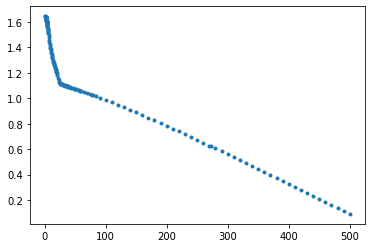

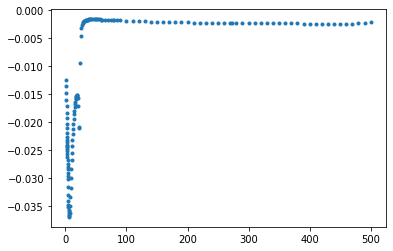

In [4]:
#Step 1. Read in txt file

data = np.genfromtxt('lakeshore.txt') #temp, voltage, dV/dT
print(data.shape)

T = data[:, 0]
V = data[:, 1]
dVdT = data[:, 2]/10**3 #put it into volts rather than mv

if DEBUG:
    mpl.figure()
    mpl.plot(T, V, '.')
    mpl.show()

    mpl.figure()
    mpl.plot(T, dVdT, '.')
    mpl.show()

Value, error:  (1.5249199999999998, 2.700000000009218e-06)
Value, error:  (0.9007729999999999, 3.734980000000868e-05)
Value, error:  (0.543472, 8.73000000000311e-06)

 
 SETTING DEBUG=True
indices of closest, second closest temp  35 34
closest, test value, second closest  5.8 5.74 5.6
delta1, delta2 -0.05999999999999961 0.14000000000000057
second order derivative estimates  -0.0015000000000051405 -0.0014999999999948188
error estimate based on second order derivative term 2.700000000009218e-06


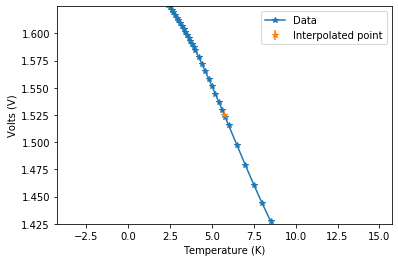

Value, error:  (1.5249199999999998, 2.700000000009218e-06)
indices of closest, second closest temp  106 107
closest, test value, second closest  140.0 144.3 150.0
delta1, delta2 4.300000000000011 -5.699999999999989
second order derivative estimates  -3.959999999999103e-06 -4.040000000000918e-06
error estimate based on second order derivative term 3.734980000000868e-05


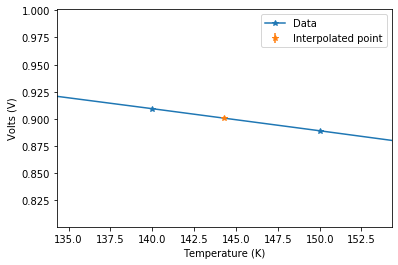

Value, error:  (0.9007729999999999, 3.734980000000868e-05)
indices of closest, second closest temp  124 123
closest, test value, second closest  310.0 307 300.0
delta1, delta2 -3.0 7.0
second order derivative estimates  -1.9400000000006912e-06 -5.999999999929673e-08
error estimate based on second order derivative term 8.73000000000311e-06


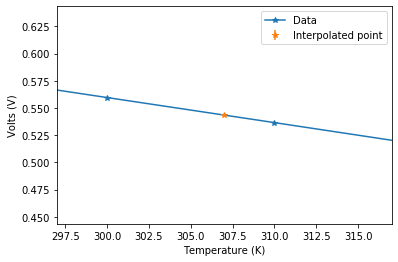

Value, error:  (0.543472, 8.73000000000311e-06)


In [5]:
###Evaluate fitting function at some Ti's to demonstrate.
#Evaluate some specific points.
Ti = [5.74, 144.3, 307] #random test points in Kelvin
for Tt in Ti:
    print('Value, error: ', fit_function(T, V, Tt, DEBUG=False))
    
#Run the same points but with DEBUG=True to see the inner workings.
#Note that the interpolated points are plotted with errorbars, but the errors are too small to see.
print('\n \n SETTING DEBUG=True')
for Tt in Ti:
    print('Value, error: ', fit_function(T, V, Tt, DEBUG=True))  

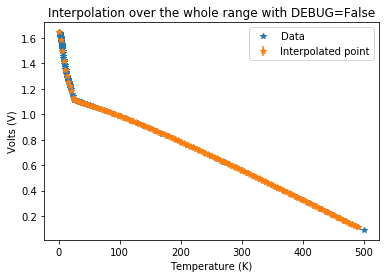

In [6]:
#Further evaluation: Can run for many points over whole range, though it doesn't display well for errors.
Ti = np.linspace(T[1], T[-2], 200)
Vout = np.zeros(len(Ti))
Verr = np.zeros(len(Ti))

for ii, Tt in enumerate(Ti):
    Vout[ii], Verr[ii] = fit_function(T, V, Tt)
    
mpl.figure()
mpl.title('Interpolation over the whole range with DEBUG=False')
mpl.plot(T, V, '*')
mpl.errorbar(Ti, Vout, yerr=Verr, fmt='*')
mpl.xlabel('Temperature (K)')
mpl.ylabel('Volts (V)')
mpl.legend(['Data', 'Interpolated point'])
mpl.show()